In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# dataset: https://greenfdc.org/countries-of-the-belt-and-road-initiative-bri/
BR_countries = pd.read_excel('/Users/emma/Desktop/gened_1068/23_12_BRI-countries-public.xlsx', sheet_name='BRI countries')

# Drop rows with NaT values in the 'Likely date of joining' column
BR_countries = BR_countries.dropna(subset=['Likely date of joining'])
BR_countries = BR_countries.reset_index(drop=True)

# # Display the DataFrame after dropping rows
# print(BR_countries.head(10))
print(BR_countries['Country'].head(10))


0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
5              Argentina
6                Armenia
7             Azerbaijan
8                Bahrain
9             Bangladesh
Name: Country, dtype: object


In [22]:
print(BR_countries['IncomeGroup'].unique())

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


In [3]:
# dataset: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
GDP = pd.read_excel('/Users/emma/Desktop/gened_1068/GDP_data.xlsx', sheet_name='Data')

# Drop the first two rows
GDP = GDP.drop([0,1])
GDP = GDP.reset_index(drop=True)

## Drop 'Country Code', 'Indicator Name', and 'Indicator Code' columns
GDP = GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# # Display the DataFrame after dropping rows
# print(GDP.head())
print(GDP.columns)


Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


In [4]:
## add columns 1960 through 2023 to the BR_countries DataFrame
years = [str(year) for year in range(2000, 2024)]
for year in years:
    BR_countries[year] = None

# For each country in BR_countries, find the corresponding row in GDP and copy the GDP growth rate for each year
for i in range(len(BR_countries)):
    country = BR_countries['Country'][i]
    row = GDP[GDP['Country Name'] == country]
    if row.empty:
        continue
    for year in years:
        BR_countries.at[i, year] = row[year].values[0]

In [5]:
## drop rows corresponding to BR countries from the GDP DataFrame
non_BR = GDP[~GDP['Country Name'].isin(BR_countries['Country'])]


In [37]:
# get average GDP growth rates

years = np.linspace(2000, 2023, 24)
BR_avgs = []
non_BR_avgs = []
BR_low = []
BR_lowmed = []
BR_upmed = []
BR_high = []

for year in years:
    BR_avgs.append(BR_countries[str(int(year))].mean())
    non_BR_avgs.append(non_BR[str(int(year))].mean())
    BR_low.append(BR_countries[BR_countries['IncomeGroup'] == 'Low income'][str(int(year))].mean())
    BR_lowmed.append(BR_countries[BR_countries['IncomeGroup'] == 'Lower middle income'][str(int(year))].mean())
    BR_upmed.append(BR_countries[BR_countries['IncomeGroup'] == 'Upper middle income'][str(int(year))].mean())
    BR_high.append(BR_countries[BR_countries['IncomeGroup'] == 'High income'][str(int(year))].mean())

In [29]:
# ## find average year of joining for BR countries
# dates = []
# for date in BR_countries['Likely date of joining']:
#     dates.append(datetime.strptime(str(date), '%Y-%m-%d'))
# average_date = sum(dates, datetime(1, 1, 1)) / len(dates)
join_date_avgs = []

for i in ['Low income', 'Lower middle income', 'Upper middle income', 'High income']:
    join_date_avgs.append(BR_countries[BR_countries['IncomeGroup'] == i]['Likely date of joining'].mean())

join_date_avgs.append(BR_countries['Likely date of joining'].mean())
print(join_date_avgs)

[Timestamp('2019-03-04 19:12:00'), Timestamp('2017-09-20 02:20:29.268292608'), Timestamp('2017-09-13 08:55:48.837209344'), Timestamp('2018-02-27 12:21:49.090909184'), Timestamp('2018-02-09 10:46:31.836734720')]


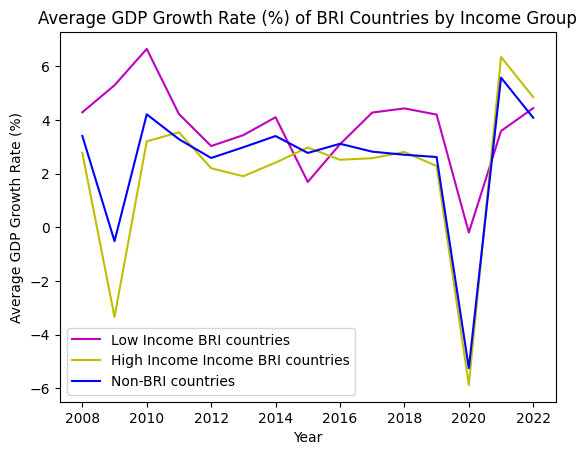

In [39]:
## plot years from 2008 to 2023 on the x-axis and the average GDP growth rate on the y-axis
plt.xlabel('Year')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Average GDP Growth Rate (%) of BRI Countries by Income Group')
plt.plot(years[8:], BR_low[8:], color='m',label='Low Income BRI countries')
# plt.plot(years[8:], BR_lowmed[8:], color='c',label='Lower Middle Income Income BRI countries')
# plt.plot(years[8:], BR_upmed[8:], color='g',label='Upper Middle Income Income BRI countries')
plt.plot(years[8:], BR_high[8:], color='y',label='High Income Income BRI countries')
plt.plot(years[8:], non_BR_avgs[8:], color='b',label='Non-BRI countries')
# plt.plot(years[8:], non_BR_avgs[8:], color='blue',label='Non-BRI countries')
plt.legend()
plt.show()

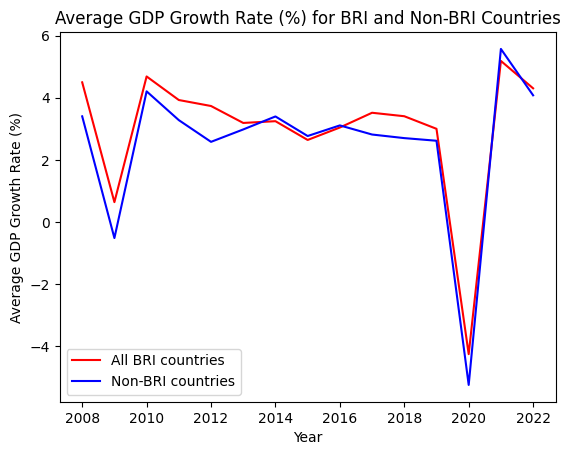

In [32]:
## plot years from 2008 to 2023 on the x-axis and the average GDP growth rate on the y-axis
plt.xlabel('Year')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Average GDP Growth Rate (%) for BRI and Non-BRI Countries')
plt.plot(years[8:], BR_avgs[8:], color='r',label='All BRI countries')
plt.plot(years[8:], non_BR_avgs[8:], color='blue',label='Non-BRI countries')
plt.legend()
plt.show()

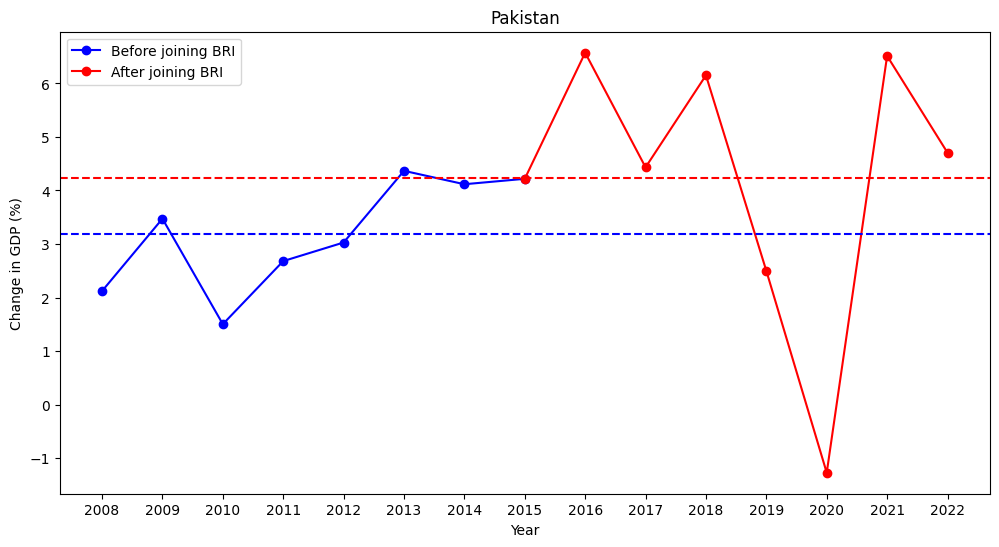

In [60]:
gdp_specific = GDP[GDP['Country Name'] == 'Pakistan']
country = 'Pakistan'

pre = []
post = []

# Check if the country is found in the GDP dataset
if not gdp_specific.empty:
  # Extract years and percent change in GDP
  years = gdp_specific.columns[4:]  # Assuming the first four columns are not years
  percent_change_gdp = gdp_specific.iloc[0, 4:]

  # Remove missing values
  years = [year for year, gdp in zip(years, percent_change_gdp) if pd.notnull(gdp)]
  percent_change_gdp = [gdp for gdp in percent_change_gdp if pd.notnull(gdp)]

  # Get the joining date of the country and extract the year
  join_date = BR_countries[BR_countries['Country'] == country]['Likely date of joining'].values[0]
  join_year = pd.to_datetime(join_date, format='%m/%d/%y').year

  # Adjust to start plotting from 2000 onwards
  start_year = 2005

  # Plotting
plt.figure(figsize=(12,6))
plt.title('Pakistan')
plt.xlabel('Year')
plt.ylabel('Change in GDP (%)')
plt.plot(years[start_year - 1960:join_year - 1960], percent_change_gdp[start_year - 1960:join_year - 1960], marker='o', label='Before joining BRI', color='blue')
plt.plot(years[join_year - 1960 - 1:], percent_change_gdp[join_year - 1960 - 1:], marker='o', label='After joining BRI', color='red')
plt.legend()
# add horizontal lines to indicate average growth before and after joining
plt.axhline(y=np.mean(percent_change_gdp[start_year - 1960:join_year - 1960]), color='blue', linestyle='--')
plt.axhline(y=np.mean(percent_change_gdp[join_year - 1960 - 1:]), color='red', linestyle='--')
plt.show()


In [62]:
print("Pakistan average 2008 - 2014 (before joining BRI): " + str(np.mean(percent_change_gdp[start_year - 1960:join_year - 1960])))
print("Pakistan average 2015 - 2022 (after joining BRI): " + str(np.mean(percent_change_gdp[join_year - 1960 - 1:])))

Pakistan average 2008 - 2014 (before joining BRI): 3.1879556553421375
Pakistan average 2015 - 2022 (after joining BRI): 4.227418386903038
